## Exercice 8.1

Adaptez l'énoncé de l'exercice 8 aux données reprises dans le fichier baseball_players.csv présent sur Moodle

    - Représenter le nuage de points correspondant
    - Construire les droites des moindres carrés qui ajuste ces données, en utilisant respectivement le poids et la taille comme variable indépendante (variable explicative)
    - Donner leurs équations
    - Estimer la taille d’un étudiant dont le poids serait de 63 kilogrammes
    - Estimer le poids d’un étudiant dont la taille serait de 178 centimètres

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

In [3]:
input_df = pd.read_csv('baseball_players.csv')

In [4]:
input_df

,Name,Team,Position,Height(inches),Weight(pounds),Age
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99
1,Paul_Bako,BAL,Catcher,74,215.0,34.69
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71
...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01


In [5]:
input_df['Taille (centimetre)'] = input_df['Height(inches)']*2.54 
input_df['Poids (kilogramme)'] = input_df['Weight(pounds)']*0.45359237

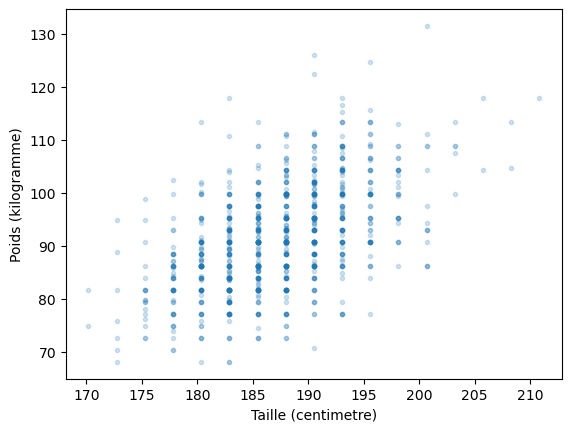

In [6]:
plt.plot(input_df['Taille (centimetre)'],input_df['Poids (kilogramme)'], '.', alpha=0.2)
plt.xlabel('Taille (centimetre)')
plt.ylabel('Poids (kilogramme)')
plt.show()

In [7]:
input_df = input_df.rename(columns={'Taille (centimetre)':'Taille','Poids (kilogramme)':'Poids'})

In [8]:
input_df

,Name,Team,Position,Height(inches),Weight(pounds),Age,Taille,Poids
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99,187.96,81.646627
1,Paul_Bako,BAL,Catcher,74,215.0,34.69,187.96,97.522360
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78,182.88,95.254398
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43,182.88,95.254398
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71,185.42,85.275366
...,...,...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08,185.42,86.182550
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73,187.96,81.646627
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19,190.50,92.986436
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01,190.50,86.182550


In [9]:
input_df[['Poids','Taille']].cov()

,Poids,Taille
Poids,90.660487,29.667609
Taille,29.667609,34.301855


In [10]:
a = input_df.cov()['Poids']['Taille']/input_df.cov()['Taille']['Taille']

In [11]:
b = input_df['Poids'].mean() - a * input_df['Taille'].mean()

In [12]:
a, b

(0.8648981014097074, -70.41653889800017)

In [13]:
input_df['Modele Poids vs Taille'] = a * input_df['Taille'] + b

In [14]:
input_df

,Name,Team,Position,Height(inches),Weight(pounds),Age,Taille,Poids,Modele Poids vs Taille
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99,187.96,81.646627,92.149708
1,Paul_Bako,BAL,Catcher,74,215.0,34.69,187.96,97.522360,92.149708
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78,182.88,95.254398,87.756026
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43,182.88,95.254398,87.756026
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71,185.42,85.275366,89.952867
...,...,...,...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08,185.42,86.182550,89.952867
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73,187.96,81.646627,92.149708
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19,190.50,92.986436,94.346549
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01,190.50,86.182550,94.346549


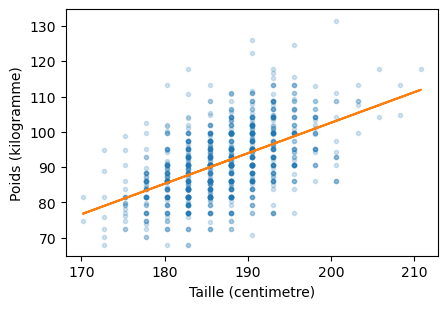

In [15]:
fac = 0.8
plt.rcParams["figure.figsize"] = (fac*6,fac*4)
plt.plot(input_df['Taille'], input_df['Poids'], '.', alpha=0.2)
plt.plot(input_df['Taille'],input_df['Modele Poids vs Taille'],'-')
plt.xlabel('Taille (centimetre)')
plt.ylabel('Poids (kilogramme)')
plt.show()

Ceci correspond donc à l'explication du poids par la taille.

Poids estimé d'un étudiant de 1m78:

In [16]:
a*178+b

83.53532315292773

Même exercice mais dans l'autre sens, soit estimer la taille à partir du poids...

In [17]:
aa = input_df.cov()['Poids']['Taille']/input_df.cov()['Poids']['Poids']

In [18]:
bb = input_df['Taille'].mean() - aa * input_df['Poids'].mean()

In [19]:
aa,bb

(0.32723857918237736, 157.2537963223319)

In [20]:
input_df['Modele Taille vs Poids'] = aa * input_df['Poids'] + bb

In [21]:
input_df

,Name,Team,Position,Height(inches),Weight(pounds),Age,Taille,Poids,Modele Poids vs Taille,Modele Taille vs Poids
0,Adam_Donachie,BAL,Catcher,74,180.0,22.99,187.96,81.646627,92.149708,183.971722
1,Paul_Bako,BAL,Catcher,74,215.0,34.69,187.96,97.522360,92.149708,189.166875
2,Ramon_Hernandez,BAL,Catcher,72,210.0,30.78,182.88,95.254398,87.756026,188.424710
3,Kevin_Millar,BAL,First_Baseman,72,210.0,35.43,182.88,95.254398,87.756026,188.424710
4,Chris_Gomez,BAL,First_Baseman,73,188.0,35.71,185.42,85.275366,89.952867,185.159186
...,...,...,...,...,...,...,...,...,...,...
1029,Brad_Thompson,STL,Relief_Pitcher,73,190.0,25.08,185.42,86.182550,89.952867,185.456052
1030,Tyler_Johnson,STL,Relief_Pitcher,74,180.0,25.73,187.96,81.646627,92.149708,183.971722
1031,Chris_Narveson,STL,Relief_Pitcher,75,205.0,25.19,190.50,92.986436,94.346549,187.682545
1032,Randy_Keisler,STL,Relief_Pitcher,75,190.0,31.01,190.50,86.182550,94.346549,185.456052


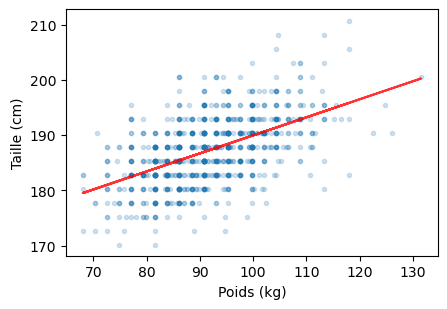

In [22]:
fac = 0.8
plt.rcParams["figure.figsize"] = (fac*6,fac*4)
plt.plot(input_df['Poids'],input_df['Taille'], '.', alpha=0.2)
plt.plot(input_df['Poids'],input_df['Modele Taille vs Poids'], '-', alpha=0.8, color='red')
plt.xlabel('Poids (kg)')
plt.ylabel('Taille (cm)')
plt.show()

Taille estimée d'une personne pesant 63 kg:

In [23]:
aa*63+bb

177.86982681082168

Représentons les deux analyses (explication du poids en fonction de la taille ou l'inverse) dans un même graphe 
et reprenons les deux estimations demandées: poids d'une personne de 1m78 pour le premier modèle et taille d'une personne 
de 63 kg pour le deuxième modèle.

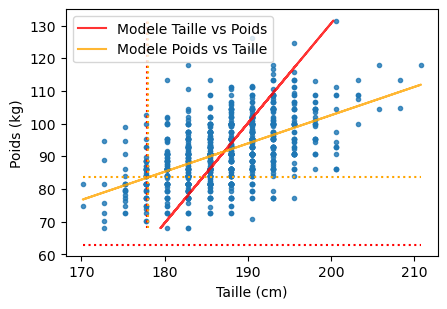

In [24]:
plt.plot(input_df['Taille'],input_df['Poids'],'.',alpha=0.8)

plt.plot(input_df['Modele Taille vs Poids'], input_df['Poids'], '-', alpha=0.8, color='red', label='Modele Taille vs Poids')
plt.hlines(y=63, xmin=np.min(input_df['Taille']), xmax=np.max(input_df['Taille']), color='red', linestyles='dotted')
plt.vlines(x=aa*63+bb, ymin=np.min(input_df['Poids']), ymax=np.max(input_df['Poids']), color='red', linestyles='dotted')

plt.plot(input_df['Taille'], input_df['Modele Poids vs Taille'], '-', alpha=0.8, color='orange', label='Modele Poids vs Taille')
plt.vlines(x=178, ymin=np.min(input_df['Poids']), ymax=np.max(input_df['Poids']), color='orange', linestyles='dotted')
plt.hlines(y=a*178+b, xmin=np.min(input_df['Taille']), xmax=np.max(input_df['Taille']), color='orange', linestyles='dotted')

plt.ylabel('Poids (kg)')
plt.xlabel('Taille (cm)')
plt.legend()
plt.show()

On voit qu'ici, il est rare de trouver un joueur de baseball de 63 kg!!!

On peut comprendre!!!

Il ne fera pas le poids!!!